# Maximum Likelihood and Applications in Astronomy, Part I

M. Juric (with material from G. Richards 2016, Ivezic [Sections 4.0, 4.1, 4.2.1-6, 4.3], Bevington, and Leighly).

## Statistical Modeling

A statistical model is a mathematical model that captures assumptions about hown the data were generated (i.e., both the physical and the measurement process that generated them).

It is a formal (quantitative) representation of the theory.

Example: the data below follow a linear x-y relationship ($y_{true}(x) = ax+b$) and are measured by an instrument that adds some random, Gaussian, error (i.e. $y = y_{true}(x) + r$, where $r$ has been drawn from $N(0, \sigma)$). The parameters of this model would be $a, b$, and $\sigma$.

Astronomical example: imagine time is $x_1$ below, $y$ is a star's flux, and $\sigma$ is the error in flux estimate. The parameters $a$ and $b$ would correspond to the rate of change of flux with time, and the flux at $t=0$, respectivelly.

![SlideGrab](figures/AnscombeQuartet.jpg)

## Statistical Inference

Statistical *inference* is about drawing conclusions from data, specifically determining the properties of a population by data sampling.

Three examples of inference are:
1. What is the best estimate for a model parameter?
2. How confident we are about the obtained value?
3. Is the particular model/hypothesis consistent with the data?

## Statistical Inference Process

We can break down the inference process (loop) into a few somewhat overlapping conceptual steps:

1. **Hypothesis**: Formulate a model, a *hypothesis*, about how the data are generated. For example, this could be a statement that the data are a measurement of some quantity that come with Gaussian random errors (i.e., each measurement is equal to the true value, plus a deviation randomly drawn from the normal distribution). Models are typically written as an equation parametrized by a set of model parameters $\boldsymbol{\theta}$, denoted as $\boldsymbol{M}(\boldsymbol{\theta})$. Note that both $\boldsymbol{\theta}$ and/or $\boldsymbol{M}$ can be vectors (e.g. for a simple one-dimensional $y(x)$ linear dependence, $\boldsymbol{\theta} = \{a, b\}$ and $\boldsymbol{M} = \{ y \}$.
2. **Parameter Estimation**: Search for the "best" model parameters $\boldsymbol{\theta}$, usually by maximizing or minimizing a particular objective function (more soon).
3. **Quantifying Estimate Uncertainty**: Determine what uncertainty remains about the values of model parameters -- the confidence region for model.
4. **Hypothesis Testing**: Test whether our hypothesis $\boldsymbol{M}(\boldsymbol{\theta})$ can be ruled out by the data (does the data (not) fit?). Possibly GOTO #1.

These steps represent a blueprint for the frequentist approach in general. The **likelihood** (to be introduced soon) is just one of many possible so-called objective functions (also called fitness functions, or cost functions); other possibilities are explored briefly in §4.2.8 of the textbook.

## Some Terminology

* We typically study the properties of some ***population*** by measuring ***samples*** from that population. The population doesn't have to refer to different objects. E.g., we may be (re)measuring the position of an object at rest; the population is the (imagined) distribution of an infinite number of measurements smeared by the error, and the sample are the measurement we've actually taken.
* A ***statistic*** is any function of the sample. For example, the sample mean is a statistic. But also, "the value of the first measurement" is also a statistic (though not a particularly good one!).
* To conclude something about the population from the sample, we develop ***estimators***. An estimator is any statistic used as a rule for calculating an estimate of a given quantity based on the observed data: thus the rule (the *estimator*), the quantity of interest (the *estimand*) and its result (the *estimate*) can be distinguished. Sometimes *estimator* and the *estimate* are used interchangeably in everyday (scientific) language. Much of frequentist statistics concerns itself with development of different estimation rules -- different estimators -- and proving their properties.
* There are ***point*** and ***interval estimators***. The point estimators yield single-valued results (example: the position of an object), while with an interval estimator, the result would be a range of plausible values (example: confidence interval for the position of an object).

## Motivating Example: Measuring the Position of a Quasar

Let's assume we wish to estimate the true position $x_{true} \equiv \mu_{true}$ of a quasar from a series of astrometric measurements $\{ x_i \}$. For simplicity, we look at a simplified 1D case (a single coordinate).

1. We adopt a hypothesis (model) where a) the observed quasar does not move, and b) individual measurement errors are drawn from a normal (Gaussian) distribution.
2. We derive the expression for the likelihood of there being a quasar at some position $x = \mu$ that gives rise to our individual measurements $\{x_i\}$. We find the value of $\hat \mu$ for which our observations are maximally likely (maximize the likelihood function).
3. We determine the error bars (confidence intervals) on our measurement.
4. We test whether what we've observed is consistent with our adopted model. For example, is it possible that the quasar was really a misidentified star with measurable proper motion?


### The Probability of Obtaining a Particular Measurement

As our measurement errors are Gaussian, the probability density of each measurement (assuming the quasar's true location is $\mu$, and the precision of our apparatus is $\sigma$) is given by:

$$p(x \mid \boldsymbol{M(\theta)}) = p(x|\mu + N(0, \sigma)) = p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right).$$

This is the probability of a measurement being between $x, x+dx$ given the model parameter values $\mu, \sigma$.

Note the notational sloppiness in the second equality sign above, where we dropped $N()$: it's typical to just name the parameters when writing out PDFs, and leave the mathematical details of the model implied from the context.

Here's a visualization with $\mu = 5$, and $\sigma = 1$:

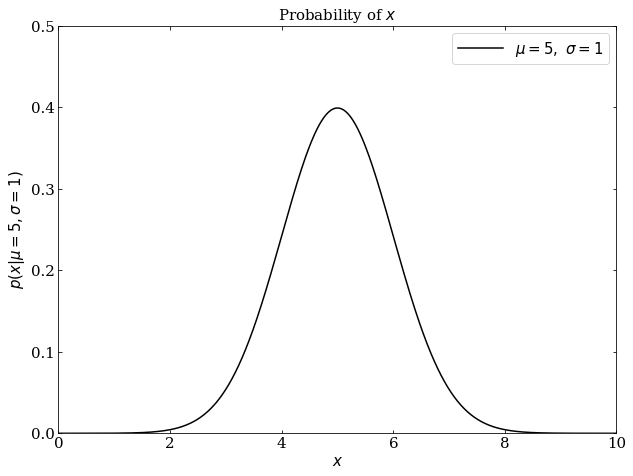

In [1]:
# Execute this cell
%matplotlib inline
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=False)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(10, 7.5))
dist = norm(5, 1)
x = np.linspace(0, 10, 1000)
plt.plot(x, dist.pdf(x), c='black',label=r'$\mu=5,\ \sigma=1$')

plt.xlim(0, 10)
plt.ylim(0, 0.5)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu=5,\sigma=1)$')
plt.title('Probability of $x$')

plt.legend();

### The Probability of the Dataset (of the Sample)

But we (usually) have more than one measurement -- a set of measurements, ${x_i}$.

If we want to know the *joint* probability of obtaining that entire set, we compute the *product* of all the individual probabilities:

$$p(\{x_i\}|\boldsymbol{M(\theta)}) = \prod_{i=1}^n p(x_i|\boldsymbol{M(\theta)}),$$

Why? Because for independent events (and we assume the results of individual measurements are independent), the joint probability is simply the product of individual probabilities -- i.e., $p(A, B) = p(A)p(B)$.

For our quasar-with-Gaussian-errors example, this equates to:

$$p(\{x_i\}|N(\mu, \sigma)) = \prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{(x_i-\mu)^2}{2\sigma^2}\right),$$

which we can rewrite as:

$$p(\{x_i\}|N(\mu, \sigma)) = \left( \prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}} \right) \exp\left( -\frac{1}{2} \sum \left[\frac{(x_i-\mu)}{\sigma} \right]^2 \right),$$

where we have written the product of the exponentials as the exponential of the sum of the arguments.

## Introducing Maximum Likelihood Estimation (MLE)

We now have a way to compute the joint probability to obtain a set of measurements $\{x_i\}$ if the quasar's true position is known to be $\mu$, and the measurement apparatus' precision was $\sigma$:

$$p(\{x_i\}|N(\mu, \sigma))$$

But our situation is the reverse: it's the data that are known, and we want to estimate the parameters, $\mu$ and $\sigma$. So we come to an idea: ***let us vary and pick the values of $\mu$ and $\sigma$ that result in the largest probability that the dataset $\{ x_i \}$ would be measured***. Intuitively that makes sense (and mathematically it can be shown that this leads to estimators with many good properties).

In other words, we take the expression above, and now **think of the data as fixed**, and it being a ***function of the unknown model parameters***:

$$L(\mu, \sigma) \equiv p(\{x_i\}|N(\mu, \sigma))$$

or, more generally:

$$L(\boldsymbol \theta) \equiv p(\boldsymbol D|M(\boldsymbol \theta))$$

and ***find the value of $\boldsymbol \theta$ that maximizes $L$***:

$$\underset{\boldsymbol{\theta}_{ML}}{\max}\,\,  L(\boldsymbol{\theta}) \equiv p(\boldsymbol D|M(\boldsymbol \theta)) $$

Those will be our **maximum likelihood estimates (MLEs)** for the true values of the particular model. In the notation above, $D$ stands for the set of collected data.

(note: this is $\S 4.2$ in the textbook).

## Quasar example (w. known, homoscedastic, measurement errors)

We've already assumed in our problem that the precision of our instrument is always the same (we used the same $\sigma$). This is known as the measurement having **homoscedastic errors** -- errors drawn from the same distribution with fixed parameters. Note this does not mean the individual errors are the same -- just that they've been drawn from the same distribution.

We'll next further simplify our example by assuming the precision of our instrument is also a-priori known. This makes the math easier, but results will generalize.

Therefore, we now have only one unknown parameter in our model, the true position of the quasar $\mu$:

$$L(\mu) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right).$$

.

## Visualizing this

Let's simulate 150 measurements ${x_i}$ drawn from a Gaussian with $\mu = 5$ (quasar position) and $\sigma = 1$ (measurement error), and draw the histogram of measurements:

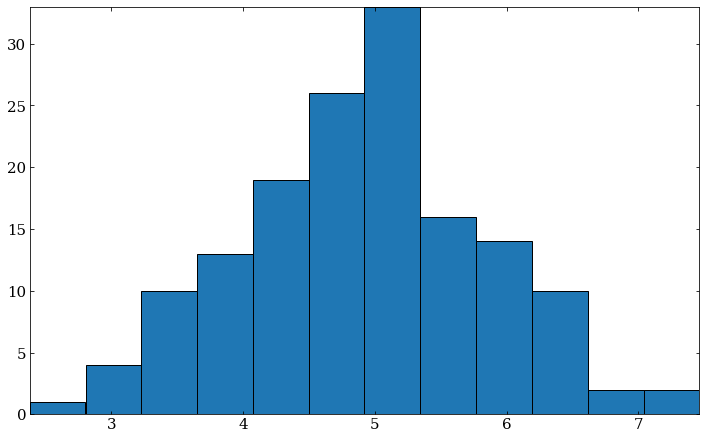

In [2]:
# Execute this cell
%matplotlib inline
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=False)

#------------------------------------------------------------
np.random.seed(seed=42)
Nsamples=150
mu_true = 5.
measurements = np.random.normal(mu_true, 1, Nsamples)

fig, ax = plt.subplots(figsize=(12, 7.5))
ax.hist(measurements, bins='fd');

Now overplot and eyeball the model for some value of $\mu$. Does it seem like a "good fit"?

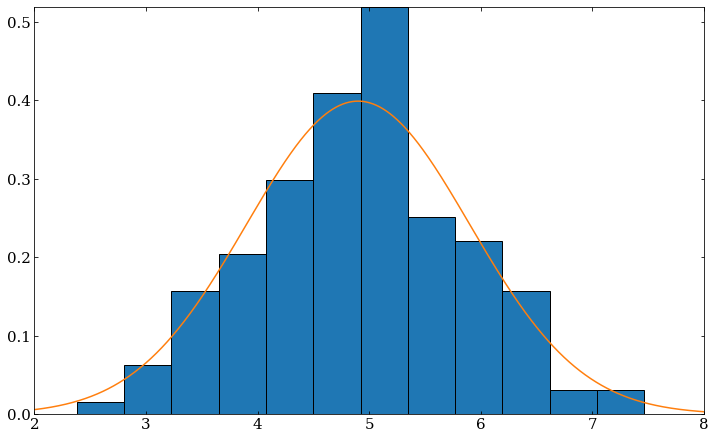

In [3]:
def overplot_model(mu):
    fig, ax = plt.subplots(figsize=(12, 7.5))

    ax.hist(measurements, bins='fd', density=True);
    x = np.linspace(2, 8, 1000)
    ax.plot(x, norm(mu, 1).pdf(x))

overplot_model(mu=4.9)

In [4]:
import ipywidgets as widgets
from ipywidgets import interact, fixed

interact(overplot_model, mu=widgets.FloatSlider(min=2, max=8, step=0.1, value=4.5));

interactive(children=(FloatSlider(value=4.5, description='mu', max=8.0, min=2.0), Output()), _dom_classes=('wi…

How does the likelihood behave as we explore different potential values of $\mu$?

In [5]:
import ipywidgets as widgets
from ipywidgets import interact, fixed

def overplot_model_and_L(mu):
    fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(12, 7.5))

    ax1.hist(measurements, bins='fd', density=True);
    x = np.linspace(2, 8, 1000)
    ax1.plot(x, norm(mu, 1).pdf(x))
    ax1.set_xlabel('$x$')
    ax1.set_ylabel(r'$p_{\rm histogram}(x)$')
    ax1.set_xlim(2, 8)

    #------------------------------------------------------------
    # plot the likelihood distributions
    mu_est = np.average(measurements)
    L = lambda mu: np.prod( norm(measurements, 1).pdf(mu) )

    L_mu = L(mu)
    ax2.scatter([mu], [L_mu])

    ax2.set_xlim(2, 8)
    ax2.set_ylim(0, 1.1*L(mu_est))
    ax2.set_xlabel('$\mu$')
    ax2.set_ylabel(r'$L(\mu)$')

interact(overplot_model_and_L, mu=widgets.FloatSlider(min=3, max=7, step=0.1, value=4.5));

interactive(children=(FloatSlider(value=4.5, description='mu', max=7.0, min=3.0), Output()), _dom_classes=('wi…

The above allows us to explore all values of $\mu$ and find the maximum! 

### Finding the Maximum Analytically

For practical (and some theoretical) reasons, it's better to work with the natural logarithm of the likelihood.

We define the *log-likelihood function* as ${\rm lnL} = \ln[L(\theta)]$.  The maximum of this function happens at the same place as the maximum of $L$. We therefore have:

$${\rm ln}\,L = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma^2}.$$

Take a second and make sure that you understand how we got there.  It might help to remember that above, we wrote:

$$L(\mu) = \left( \prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}} \right) \exp\left( -\frac{1}{2} \sum \left[\frac{(x_i-\mu)}{\sigma} \right]^2 \right).$$

We then determine the maximum in the same way that we always do.  It is the parameter set for which the derivative of ${\rm lnL}$ is zero:

$$\frac{d\;{\rm lnL}(\mu)}{d\mu}\Biggr\rvert_{\hat \mu} \equiv 0.$$

That gives $$ \sum_{i=1}^N \frac{x_i - \hat \mu}{\sigma^2} = 0.$$

(note: we should also check that the $2^{\rm nd}$ derivative is negative, to ensure this is the *maximum* of $L$)

(also note: any constants in $\ln L$ disappear when differentiated, so constant terms can typically be ignored.)

Since $\sigma = {\rm constant}$, that says 

$$\sum_{i=1}^N x_i = \sum_{i=1}^N \hat \mu = N \hat \mu.$$

Thus we find that

$$\hat \mu = \frac{1}{N}\sum_{i=1}^N x_i \equiv \bar x,$$

which is just the arithmetic mean of all the measurements.

### The Sample Mean is an ML Estimator

We have now shown that the maximum-likelihood estimator for a normal distribution's $\mu$ parameter (assuming fixed $\sigma$) is just the arithmetic mean of all observations.

Remember that the arithmetic mean was **defined** as:

$$ \bar x \equiv \mathbf{E}[\hat h] $$

and because:

$$ \mu = \mathbf{E}[N(\mu, \sigma)] $$

we **hoped** it would be a good estimator of $\mu$.

Now that we **know** that the arithmetic mean is actually a Maximum Likelihood (ML) estimator ***for a homoscedastic Gaussian*** with known errors, we **know** it has all of the good ML estimator properties.

### Properties of ML Estimators

Assuming the data truly are drawn from the model, ML estimators have the following useful properties:

* **They are consistent estimators**; that is, they can be proven to converge to the true parameter value as the number of data points increases.
* **They are asymptotically normal estimators**. The distribution of the parameter estimate, as the number of data points increases to infinity, approaches a normal distribution, centered at the MLE, with a certain spread. This spread can often be easily calculated and used as a confidence band around the estimate, as discussed below.
* **They asymptotically achieve the theoretical minimum possible variance, called the Cramér–Rao bound**. In other words, they achieve the best possible error given the data at hand; that is, no other estimator can do better in terms of efficiently using each data point to reduce the total error of the estimate (see eq. 3.33 in the textbook).

Note: ML estimators are *not* guarenteed to be unbiased! Uncorrected standard deviation is the ML estimator for population standard deviation, yet as we've seen it's a biased estimator.

## Quantifying Estimate Uncertainty

Let us look at what the full likelihood function looks like for our heteroscedastic Gaussian case:

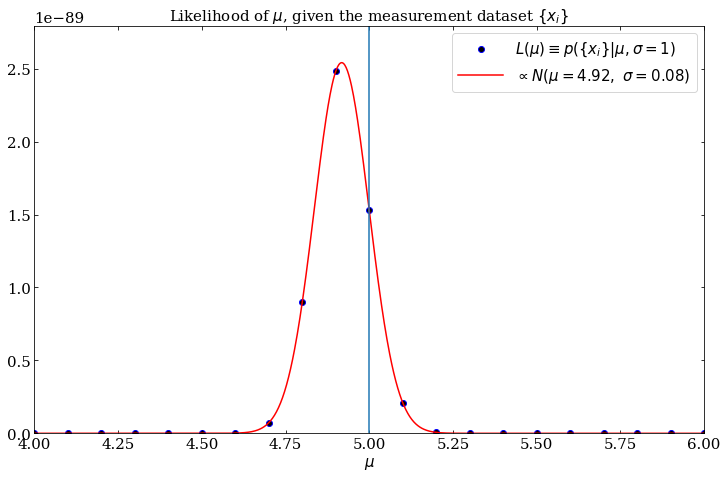

In [6]:
mu_est = np.average(measurements)
mu_est_err = 1./np.sqrt(Nsamples)

#------------------------------------------------------------
L = lambda mu: np.prod( norm(measurements, 1).pdf(mu) )

#------------------------------------------------------------
# plot the likelihood distributions
fig, ax = plt.subplots(figsize=(12, 7.5))
mu = np.linspace(4, 6, 21)
L_mu = np.vectorize(L)(mu)
plt.scatter(mu, L_mu, c='black', label=r'$L(\mu) \equiv p(\{x_i\}|\mu,\sigma=1)$')

# overplot the gaussian of the same width
v = np.linspace(0, 10, 5000)
C = L(mu_est) / norm(mu_est, mu_est_err).pdf(mu_est)
plt.plot(v, C*norm(mu_est, mu_est_err).pdf(v), c='red', label=r'$\propto N(\mu=%.2f,\ \sigma=%.2f)$' % (mu_est, mu_est_err))
plt.axvline(5)

plt.xlim(4, 6)
plt.ylim(0, 1.1*L(mu_est))
plt.xlabel('$\mu$')
#plt.ylabel()
plt.title('Likelihood of $\mu$, given the measurement dataset $\{x_i\}$')

# plot legend in the requested order (work around a matplot bug/feature)
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]);

This is just a Gaussian with the mean at $\hat \mu$ and standard deviation $\frac{\sigma}{\sqrt N}$!

Proof:

$$L(\mu) = \left( \prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}} \right) \exp\left( - \frac{1}{2} \sum \left[\frac{(x_i-\mu)}{\sigma} \right]^2 \right) \propto \exp\left( - \frac{1}{2\sigma} \sum (x_i-\hat x + \hat x  -\mu)^2 \right) =\, ... $$
$$ = \exp\left( - \frac{N}{2\sigma^2} \sum (\hat x  -\mu)^2 \right).$$

It tells us how **relatively likely** any other value of $\mu$ is. The $(\hat \mu - \sigma_\mu, \hat \mu + \sigma_\mu)$ range gives us a **confidence interval**. If we repeated the same measurement a hundred times, we'd find for 68 experiments the true value was within their computed confidence intervals ($1 \sigma$ errors).

Note: This also confirms that the standard error of the mean is equal to $\frac{\sigma}{\sqrt N}$. I stated this previously when discussing the Central Limit Theorem, but now ***you*** *can prove this* starting with the expression for $L(\mu)$ for the homoscedastic Gaussian model (after some straightforward but tedious manipulation of the sums under the exponential, above).

## Generalizing the Quantification of Estimate Uncertainty

For any likelihood distribution, with any number of parameters, we *define* the uncertainties on our MLEs as the second (partial) derivatives of the log-likelihood:

$$\sigma^{-2}_{jk} = - \frac{d^2}{d\theta_j} \frac{\ln L}{d\theta_k} \Biggr\rvert_{\theta=\hat \theta}$$

Taken together, these entries are know as the **covariance matrix**.

The marginal error bars for each parameter, $\theta_i$ are given by the square roots of the diagonal elements, $\sigma_{ii} = \sigma^2_i$. These are the "error bars" that are typically quoted with each measurement.

For our Gaussian example: 
$$\sigma_{\mu} = \left( - \frac{d^2\ln L(\mu)}{d\mu^2}\Biggr\rvert_{\hat \mu}\right)^{-1/2}$$

we find
$$\frac{d^2\ln L(\mu)}{d\mu^2}\Biggr\rvert_{\hat \mu} = - \sum_{i=1}^N\frac{1}{\sigma^2} = -\frac{N}{\sigma^2},$$
since, again, $\sigma = {\rm constant}$. Therefore:

$$\sigma_{\mu} = \frac{\sigma}{\sqrt{N}}.$$

So, our estimator of $\mu$ is $\overline{x}\pm\frac{\sigma}{\sqrt{N}}$ as discussed above.

### What is $\pm \sigma$? Interpretation as a Gaussian Approximation to the Likelihood Function

The result for $\sigma_{\mu}$ has been derived by expanding $\ln L$ in a Taylor series around the maximum and retaining terms up to second order (essentially, $\ln L$ is approximated by a parabola, or an ellipsoidal surface in multidimensional cases, around its maximum). If this expansion is exact (as is the case for a Gaussian error distribution), then we've completely captured the uncertainty information.

In general, this is not the case and the error bars give a ***Gaussian approximation*** to the actual likelihood surface. The true likelihood surface can significantly deviate from a smooth Gaussian shape. Furthermore, it often happens in practice that the likelihood surface is multimodal.

It is always a good idea to visualize the likelihood surface when in doubt (see examples in §5.6 in the textbook).

### MLE applied to a Heteroscedastic Gaussian

Now let's look at a case where the errors are heteroscedastic.  For example, the weather is different each time we measure the position of our quasar, and therefore the astrometric uncertainty $\sigma_i$ is different for each measurement, but still known. Since $\sigma$ is not a constant, then following what we previously wrote, we have:

$$\ln L = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma_i^2}.$$

Taking the derivative:
$$\frac{d\;{\rm lnL}(\mu)}{d\mu}\Biggr\rvert_{\hat \mu} = \sum_{i=1}^N \frac{(x_i - \hat \mu)}{\sigma_i^2} = 0,$$
then simplifying:

$$\sum_{i=1}^N \frac{x_i}{\sigma_i^2} = \sum_{i=1}^N \frac{\hat \mu}{\sigma_i^2},$$

yields a MLE solution of 
$$\hat \mu = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)},$$

with uncertainty
$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}.$$




## Goodness of Fit

The MLE approach tells us what the "best" model parameters are, but not how good the fit is in absolute terms.  If the model is wrong, "best" might not be particularly revealing !

## Goodness of Fit and $\chi^2$

What does it mean that "the fit is good"? **We can quantify it by observing how likely it is we would draw a dataset with this particular $\ln L(\hat \mu)$, if the model is correct, and seeing whether that's very unlikely (in which case, the hypothesis is probably incorrect)**.

We can define a quantity $\chi^2$:

$$\chi^2 \equiv \sum_{i=1}^N \left({x_i-\mu \over \sigma_i}\right)^2,$$

and then for the Gaussian case we've been studying we obtain:

$$\ln L = {\rm constant} - \frac{1}{2}\sum_{i=1}^N z^2 = {\rm constant} - \frac{1}{2}\chi^2.$$

Note that there's a 1:1 relationship between the $\chi^2$ and $\ln L$. We can therefore also look at how likely is it that a particular $\chi^2$ would occur when drawing a sample. (this is how it's traditionally done, and has a few other benefits).

## The distribution of $\chi^2$ values

Let's compute the $\chi^2$s for (say) $5,000$ samples of (say) 5 measurements, and see what the distribution looks like:

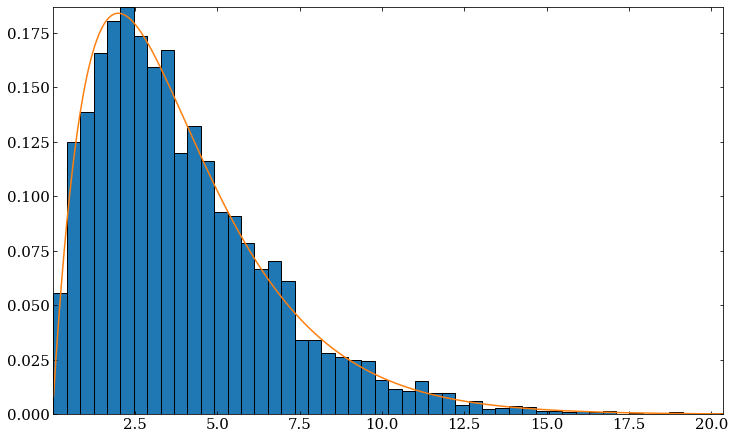

In [7]:
%matplotlib inline
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=False)

#------------------------------------------------------------
np.random.seed(seed=42)
Nsamples=5
mu_true = 5.
sigma = 1.

Ndraws = 5000
chi2vals = np.empty(Ndraws)

for i in range(Ndraws):
    measurements = np.random.normal(mu_true, sigma, Nsamples)
    mu_est = np.average(measurements)
    chi2vals[i] = np.sum(np.square((measurements - mu_est) / sigma))

fig, ax = plt.subplots(figsize=(12, 7.5))
ax.hist(chi2vals, bins='fd', density=True);

from scipy.stats import chi2
v = np.linspace(*ax.get_xlim(), 1000)
ax.plot(v, chi2.pdf(v, Nsamples - 1))

Our computed $\chi^2$ values are distributed as the **$\chi^2$ distribution (with $k=N-N_{par}$ degrees of freedom).**

The *number of degrees of freedom*, $k$ is given by the number of data points, $N$, minus any constraints (the number of model parameters, $N_{par}$). Given those two, the $\chi^2$ distribution is defined by:

$$p(Q \mid k)\equiv \chi^2(Q \mid k) = \frac{1}{2^{k/2}\Gamma(k/2)}Q^{k/2-1}\exp(-Q/2),$$

where $Q \equiv \chi^2 >0$. Note that the $\Gamma$ function would just be the usual factorial function if we were dealing with integers, but here we have half integers.

This is ugly, but it is really just a formula like anything else.  Note that the shape of the distribution *only* depends on the sample size $N=N-N_{par}$ and not on either $\mu$ or $\sigma$!

## Testing for goodness of fit

The main idea is to see how probable is it that, if this is the correct model, our particular value of $\chi^2$ would arise. If the probability is low (discuss: how low?), we may need to rethink our hypothesis.

Example: we now draw a sample from a uniform distribution, but still assume it's just a single value + Gaussian errors:

χ^2(uniform sample) = 1.796


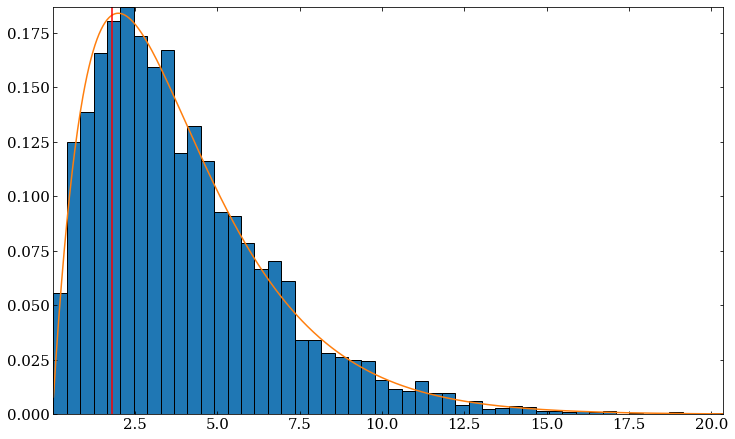

In [8]:
%matplotlib inline
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=False)

#------------------------------------------------------------
np.random.seed(seed=42)
Nsamples=5
mu_true = 5.
sigma = 1.

Ndraws = 5000
chi2vals = np.empty(Ndraws)

for i in range(Ndraws):
    measurements = np.random.normal(mu_true, sigma, Nsamples)
    mu_est = np.average(measurements)
    chi2vals[i] = np.sum(np.square((measurements - mu_est) / sigma))

fig, ax = plt.subplots(figsize=(12, 7.5))
ax.hist(chi2vals, bins='fd', density=True);

from scipy.stats import chi2
v = np.linspace(*ax.get_xlim(), 1000)
ax.plot(v, chi2.pdf(v, Nsamples - 1))

# Test with a sample _not_ drawn from the gaussian model (say, uniform)
measurements = np.random.uniform(mu_true - sigma, mu_true + sigma, Nsamples)
mu_est = np.average(measurements)
chi2uni = np.sum(np.square((measurements - mu_est) / sigma))
print("χ^2(uniform sample) = %.3f" % chi2uni)
ax.axvline(chi2uni, color='red')

Let's play with this a bit more...

In [9]:
%matplotlib inline
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=False)

#------------------------------------------------------------
np.random.seed(seed=42)
Nsamples=5
mu_true = 5.
sigma = 1.

import ipywidgets as widgets
from ipywidgets import interact, fixed

def make_chi2_plot(Nsamples, mu_true, sigma):
    Ndraws = 5000
    chi2vals = np.empty(Ndraws)

    for i in range(Ndraws):
        measurements = np.random.normal(mu_true, sigma, Nsamples)
        mu_est = np.average(measurements)
        chi2vals[i] = np.sum(np.square((measurements - mu_est) / sigma))

    fig, ax = plt.subplots(figsize=(12, 7.5))
    ax.hist(chi2vals, bins='fd', density=True);

    from scipy.stats import chi2
    v = np.linspace(*ax.get_xlim(), 1000)
    c = chi2.pdf(v, Nsamples - 1)
    ax.plot(v, c)
    
    # Test with a sample _not_ drawn from the gaussian model (say, uniform)
    measurements = np.random.uniform(mu_true - sigma, mu_true + sigma, Nsamples)
    mu_est = np.average(measurements)
    chi2uni = np.sum(np.square((measurements - mu_est) / sigma))
    print("χ^2(uniform sample) = %.3f" % chi2uni)
    ax.axvline(chi2uni, color='red')

    ax.set_xlim(chi2.ppf(0.001, Nsamples - 1), chi2.ppf(0.999, Nsamples - 1))
    ax.set_ylim(0, 1.1*c.max())


interact(make_chi2_plot,
         Nsamples=widgets.IntSlider(min=2, max=500, step=1, value=5, continuous_update=False),
         mu_true=widgets.FloatSlider(min=0, max=10, step=1, value=5, continuous_update=False),
         sigma=widgets.FloatSlider(min=0.1, max=6, step=0.1, value=1, continuous_update=False),
        );

interactive(children=(IntSlider(value=5, continuous_update=False, description='Nsamples', max=500, min=2), Flo…

Note that:
* For small `Nsamples`, it's difficult to accept the hypothesis that the uniform has not been drawn from our model
* The shape of the distribution is independent of $\mu$ and $\sigma$
* The more samples there are (larger `Nsamples`), the more the $\chi^2$ distribution looks like a Gaussian!

### Gaussian Approximation: $\chi^2$ per degree of freedom

For large $k$ (say, $k > 100$ or so), $\chi^2$-distribution becomes well approximated by the Normal distribution (Gaussian):

$$ p(\chi^2 \mid k) \sim N(\chi^2 \mid k, \sqrt{2k}) $$

In practice we frequently divide $\chi^2$ by the number of degrees of freedom, and work with:

$$\chi^2_{dof} = \frac{1}{N-N_{par}} \sum_{i=1}^N \left(\frac{x_i-\overline{x}}{\sigma}\right)^2$$

which is distributed as

$$ p(\chi^2_{dof}) \sim N\left(\chi^2_{dof} \rvert 1, \sqrt{\frac{2}{N-N_{par}}}\right) $$

(where $k = N-N_{par}$). Therefore, we expect $\chi^2_{dof}$ to be equal to 1, to within a few $\sqrt{\frac{2}{N-N_{par}}}$.

### Exploring the Gaussian approximation



In [10]:
%matplotlib inline
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=False)

#------------------------------------------------------------
np.random.seed(seed=42)
Nsamples=5
mu_true = 5.
sigma = 1.

import ipywidgets as widgets
from ipywidgets import interact, fixed

def make_chi2_plot(Nsamples, mu_true, sigma):
    Ndraws = 5000
    chi2vals = np.empty(Ndraws)

    for i in range(Ndraws):
        measurements = np.random.normal(mu_true, sigma, Nsamples)
        mu_est = np.average(measurements)
        chi2vals[i] = np.sum(np.square((measurements - mu_est) / sigma))

    fig, ax = plt.subplots(figsize=(12, 7.5))
    ax.hist(chi2vals, bins='fd', density=True);

    from scipy.stats import chi2
    v = np.linspace(*ax.get_xlim(), 1000)
    c = chi2.pdf(v, Nsamples - 1)
    ax.plot(v, c, label=r'$\chi^2(k)$')

    g = norm(Nsamples - 1, np.sqrt(2*(Nsamples - 1))).pdf(v)
    ax.plot(v, g, color='gray', label=r'$N(k, \sqrt{2k})$ approximation')
    
    # Test with a sample _not_ drawn from the gaussian model (say, uniform)
    measurements = np.random.uniform(mu_true - sigma, mu_true + sigma, Nsamples)
    mu_est = np.average(measurements)
    chi2uni = np.sum(np.square((measurements - mu_est) / sigma))
    print("χ^2(uniform sample) = %.3f" % chi2uni)
    ax.axvline(chi2uni, color='red')

    ax.set_xlim(chi2.ppf(0.001, Nsamples - 1), chi2.ppf(0.999, Nsamples - 1))
    ax.set_ylim(0, 1.1*c.max())

    ax.legend()


interact(make_chi2_plot,
         Nsamples=widgets.IntSlider(min=2, max=1000, step=1, value=5, continuous_update=False),
         mu_true=widgets.FloatSlider(min=0, max=10, step=1, value=5, continuous_update=False),
         sigma=widgets.FloatSlider(min=0.1, max=6, step=0.1, value=1, continuous_update=False),
        );

interactive(children=(IntSlider(value=5, continuous_update=False, description='Nsamples', max=1000, min=2), Fl…

## Goodness of Fit: An Example

Physically, "not using the correct model" may come either from the object, or the misunderstanding of our measurement apparatus. For example, we can also get overly high or low values of $\chi^2_{dof}$ if our errors are under- or over-estimated.

<img src="http://www.astroml.org/_images/fig_chi2_eval_1.png" width=800>

## Summary

So now, given a model, we have a prescription for:

* Estimating its parameters (write the likelihood, find the maximum)
* Estimating the (approximate) error bars (inverse derivatives of the log likelihood)
* Assessing the goodness of fit (compare the obtained vs expected $\chi^2$)

and this is universally applicable (Gauss, Cauchy, Poisson, etc..), though analytically soluble only for a few distributions (e.g., Gauss).

### Truncated/Censored Data and Other Cost Functions

Note that dealing with missing data points ("censored data") adds complications that we don't have time to get into here, but see Textbook 4.2.7  Also maximum likelihood is just one possible "cost function", see Textbook, 4.2.8. 

### Next time:

* Least-Squares as a Maximum Likelihood problem
* Optimal photometry as a Maximum Likelihood problem
* Confidence Estimates, particularly Bootstrap and Jackknife error estimates (Textbook $\S$4.5)
* Hypothesis testing (Textbook $\S$4.7)